<a href="https://colab.research.google.com/github/mpfoster/Biochem6765/blob/master/6765_asg2_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Biochem 6765 Assignment 2 Notebook

In [0]:
# load required modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set(style="ticks")

In [38]:
# Load Anscombe's dataset:
df = pd.read_csv('https://github.com/mpfoster/Biochem6765/raw/master/data/a-data.csv')
# could also load directly from seaborn package
# df=sns.load_dataset("anscombe")
# df.head() # print out a snapshot of the data:
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [10]:
# let's define a new data frame with a subset of the data: 
df1=df.query("dataset == 'I'")    # all entries with "dataset == 'I'" will be placed in the new df1
#df1.head()
df1.describe()  # the command prints out basic statistics on the df
# can repeat the above for each of the 4 datasets

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [14]:
# or we can use the groupby command of dataframes
df.groupby(by='dataset').describe()

x                           ...     y                          
        count mean       std  min  25%  ...   min    25%   50%   75%    max
dataset                                 ...                                
I        11.0  9.0  3.316625  4.0  6.5  ...  4.26  6.315  7.58  8.57  10.84
II       11.0  9.0  3.316625  4.0  6.5  ...  3.10  6.695  8.14  8.95   9.26
III      11.0  9.0  3.316625  4.0  6.5  ...  5.39  6.250  7.11  7.98  12.74
IV       11.0  9.0  3.316625  8.0  8.0  ...  5.25  6.170  7.04  8.19  12.50

[4 rows x 16 columns]

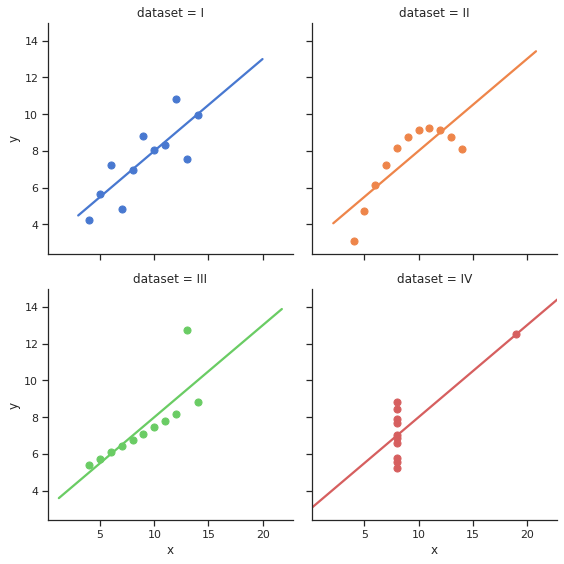

In [15]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})
# sadly, while seaborn will compute and show the best-fit regression line, 
# seaborn doesn't reveal the regression parameters

In [0]:
# linear regression is easily performed with stats, without having to install other packages
stats.linregress(df1.x,df1.y)

In [37]:
# df.groupby(by="dataset").x
 x = df[df.dataset == 'I'].x
 y = df[df.dataset == 'I'].y
 stats.linregress(x,y)


LinregressResult(slope=0.5000909090909091, intercept=3.0000909090909103, rvalue=0.8164205163448399, pvalue=0.00216962887307879, stderr=0.11790550059563408)

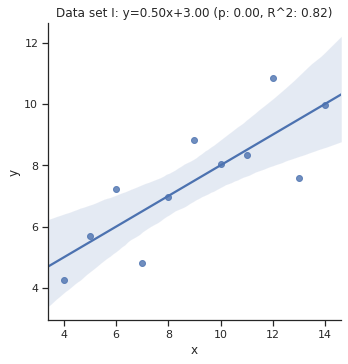

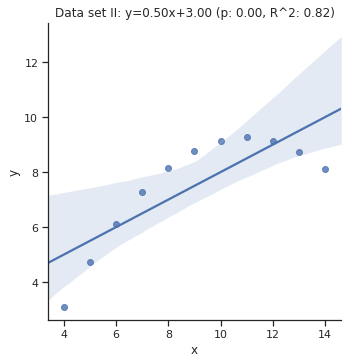

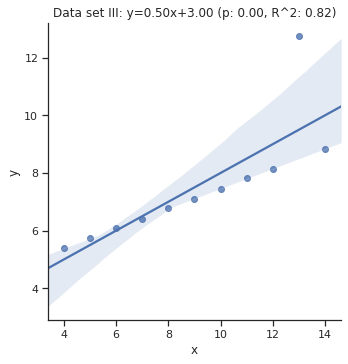

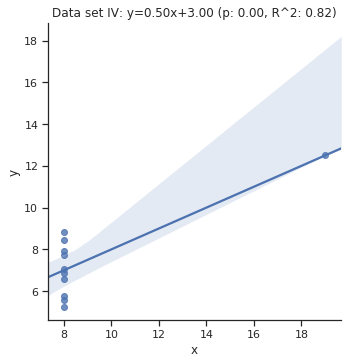

In [39]:
# or, we can get fancier and analyze all at once:
# from https://vknight.org/unpeudemath/mathematics/2016/10/29/anscombes-quartet-variability-and-ciw.html
for data_set in df.dataset.unique():
  dfa = df.query("dataset == '{}'".format(data_set))
  slope, intercept, r_val, p_val, slope_std_error = stats.linregress(x=dfa.x, y=dfa.y)
  sns.lmplot(x="x", y="y", data=dfa);
  plt.title("Data set {}: y={:.2f}x+{:.2f} (p: {:.2f}, R^2: {:.2f})".format(data_set, slope, intercept, p_val, r_val))